In [1]:
# Imports & Styling
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from datetime import timedelta
import functools 

plt.rcParams['figure.figsize'] = (14.0, 8.0)
# Control the default size of figures in this jupyter notebook

In [2]:
# Cryptos for analysis

cryptos = {
    "Bitcoin": "BTCUSD",
    "Ethereum": "ETHUSD",
    "Binance": "BNBUSD",
    "Ripple": "XRPUSD",
    "Cardano": "ADAUSD",
    "Solana": "SOLUSD",
    "Dogecoin": "DOGEUSD",
    "Polkadot": "DOTUSD",
    "Polygon": "MATICUSD",
    "Avlanche": "AVAXUSD",
    "Litecoin": "LTCUSD",
    "Cosmos": "ATOMUSD",
    "ETH Classic": "ETCUSD",
    "Monero": "XMRUSD",
    "Algorand": "ALGOUSD",
    "NEAR Protocol": "NEARUSD",
    "Flow": "FLOWUSD",
    "Tron": "TRXUSD",
    "Zcash": "ZECUSD",
    "Decentraland": "MANAUSD",
    "The Sandbox": "SANDUSD",
    "Ape Coin ?": "APEUSD",
    "Filecoin": "FILUSD",
    "Stellar": "XLMUSD",
    "USDC": "USDCUSD",
    "USDT": "USDTUSD",
}

cryptos

{'Bitcoin': 'BTCUSD',
 'Ethereum': 'ETHUSD',
 'Binance': 'BNBUSD',
 'Ripple': 'XRPUSD',
 'Cardano': 'ADAUSD',
 'Solana': 'SOLUSD',
 'Dogecoin': 'DOGEUSD',
 'Polkadot': 'DOTUSD',
 'Polygon': 'MATICUSD',
 'Avlanche': 'AVAXUSD',
 'Litecoin': 'LTCUSD',
 'Cosmos': 'ATOMUSD',
 'ETH Classic': 'ETCUSD',
 'Monero': 'XMRUSD',
 'Algorand': 'ALGOUSD',
 'NEAR Protocol': 'NEARUSD',
 'Flow': 'FLOWUSD',
 'Tron': 'TRXUSD',
 'Zcash': 'ZECUSD',
 'Decentraland': 'MANAUSD',
 'The Sandbox': 'SANDUSD',
 'Ape Coin ?': 'APEUSD',
 'Filecoin': 'FILUSD',
 'Stellar': 'XLMUSD',
 'USDC': 'USDCUSD',
 'USDT': 'USDTUSD'}

In [3]:
# Generate API CSV links

apikey = ""
# apikey = "a5a529261ae84f20655f8188ee12cc6e"
link = "https://fmpcloud.io/api/v3/historical-price-full/{PAIRING}?datatype=csv&apikey=" + apikey

for name, pairing in cryptos.items():
    print(link.replace("{PAIRING}", pairing))

https://fmpcloud.io/api/v3/historical-price-full/BTCUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/ETHUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/BNBUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/XRPUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/ADAUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/SOLUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/DOGEUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/DOTUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/MATICUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/AVAXUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/LTCUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/ATOMUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/ETCUSD?datatype=csv&ap

In [4]:
# Example w/ BTC Data

btc = pd.read_csv("./data/btc-usd_historical_chart.csv")
btc

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2022-10-09,19418.700210,19559.515061,19318.188535,19416.600338,19416.600338,2.294159e+09,2.294159e+09,-2.09987,-0.011,19431.43464,"October 09, 22",-0.00011
1,2022-10-08,19532.000786,19627.493834,19241.308154,19418.851102,19418.851102,2.117073e+09,2.117073e+09,-113.14968,-0.579,19429.21770,"October 08, 22",-0.00579
2,2022-10-07,19963.736855,20069.585984,19321.220159,19532.213283,19532.213283,5.140061e+09,5.140061e+09,-431.52357,-2.162,19641.00648,"October 07, 22",-0.02162
3,2022-10-06,20163.907324,20461.665575,19855.292188,19964.048179,19964.048179,7.452392e+09,7.452392e+09,-199.85915,-0.991,20093.66865,"October 06, 22",-0.00991
4,2022-10-05,20344.047149,20371.430833,19735.887047,20163.894906,20163.894906,7.163841e+09,7.163841e+09,-180.15224,-0.886,20090.40426,"October 05, 22",-0.00886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-10-14,5643.529785,5837.700195,5591.640137,5831.790039,5831.790039,1.669030e+09,1.669030e+09,188.26025,3.336,5753.71012,"October 14, 17",0.03336
1822,2017-10-13,5464.160156,5840.299805,5436.850098,5647.209961,5647.209961,3.615480e+09,3.615480e+09,183.04980,3.350,5641.45329,"October 13, 17",0.03350
1823,2017-10-12,4829.580078,5446.910156,4822.000000,5446.910156,5446.910156,2.791610e+09,2.791610e+09,617.33008,12.782,5238.60677,"October 12, 17",0.12782
1824,2017-10-11,4789.250000,4873.729981,4751.629883,4826.479981,4826.479981,1.222280e+09,1.222280e+09,37.22998,0.777,4817.27995,"October 11, 17",0.00777


In [5]:
# Hardcoded function to get the CSV filenames in the 'data' directory.
def getDataWindows():
    x = !dir data
    
    # Drop unecessary lines
    x = x[7:]
    x = x[:-2]
    
    # Split into each element to get filename separate
    # This splits on a space " " character, and grabs the last index of the generated list, which is the filename
    # It also appends "data/" to the front of each element.
    y = ["data/" + i.split(" ")[-1] for i in x]
    
    return y

In [6]:
data = getDataWindows()

print("Length:", len(data))
data

Length: 26


['data/ada-usd_historical_chart.csv',
 'data/algo-usd_historical_chart.csv',
 'data/ape-usd_historical_chart.csv',
 'data/atom-usd_historical_chart.csv',
 'data/avax-usd_historical_chart.csv',
 'data/bnb-usd_historical_chart.csv',
 'data/btc-usd_historical_chart.csv',
 'data/doge-usd_historical_chart.csv',
 'data/dot-usd_historical_chart.csv',
 'data/etc-usd_historical_chart.csv',
 'data/eth-usd_historical_chart.csv',
 'data/fil-usd_historical_chart.csv',
 'data/flow-usd_historical_chart.csv',
 'data/ltc-usd_historical_chart.csv',
 'data/mana-usd_historical_chart.csv',
 'data/matic-usd_historical_chart.csv',
 'data/near-usd_historical_chart.csv',
 'data/sand-usd_historical_chart.csv',
 'data/sol-usd_historical_chart.csv',
 'data/trx-usd_historical_chart.csv',
 'data/usdc-usd_historical_chart.csv',
 'data/usdt-usd_historical_chart.csv',
 'data/xlm-usd_historical_chart.csv',
 'data/xmr-usd_historical_chart.csv',
 'data/xrp-usd_historical_chart.csv',
 'data/zec-usd_historical_chart.csv']

In [7]:
# Printing data (can delete later)

# for path in data:
#     print(path)
#     print(pd.read_csv(path))
#     print()

In [8]:
len(getDataWindows())

26

In [9]:
# Get the adjusted close per day for each coin and add to 1 dataframe
crypto_df = pd.DataFrame()

for path in data:
    
    name = path.split("/")[1].split("_", maxsplit=1)[0]
    # print(name)
    
    df = pd.read_csv(path)
    df = df.set_index('date')
    
    # print(df['adjClose'])
    crypto_df[name] = df['adjClose']
    # print(crypto_df)

    
# Convert index into Datetimes and order from old -> new dates
crypto_df.index = pd.to_datetime(crypto_df.index)
crypto_df.sort_index(inplace=True)

crypto_df

,ada-usd,algo-usd,ape-usd,atom-usd,avax-usd,bnb-usd,btc-usd,doge-usd,dot-usd,etc-usd,...,near-usd,sand-usd,sol-usd,trx-usd,usdc-usd,usdt-usd,xlm-usd,xmr-usd,xrp-usd,zec-usd
date,,,,,,,,,,,,,,,,,,,,,
2017-10-10,0.021531,NaN,NaN,NaN,NaN,1.393360,4781.990234,0.001036,NaN,11.537600,...,NaN,NaN,NaN,0.002225,NaN,0.999441,0.018953,86.821198,0.260733,235.654999
2017-10-11,0.022520,NaN,NaN,NaN,NaN,1.433730,4826.479981,0.001046,NaN,11.494700,...,NaN,NaN,NaN,0.002470,NaN,0.998625,0.019450,87.421700,0.264439,236.132004
2017-10-12,0.026252,NaN,NaN,NaN,NaN,1.343760,5446.910156,0.001062,NaN,11.961900,...,NaN,NaN,NaN,0.002345,NaN,0.997423,0.017784,87.092400,0.248414,227.003998
2017-10-13,0.033641,NaN,NaN,NaN,NaN,1.435480,5647.209961,0.001066,NaN,12.183800,...,NaN,NaN,NaN,0.002113,NaN,1.000050,0.017960,95.134598,0.260489,240.048996
2017-10-14,0.032465,NaN,NaN,NaN,NaN,1.538190,5831.790039,0.001110,NaN,12.256800,...,NaN,NaN,NaN,0.002394,NaN,0.999709,0.017522,100.230003,0.257320,240.888000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,0.431018,0.353904,5.203787,13.008994,17.382954,294.273885,20163.894906,0.064795,6.440762,27.635133,...,3.697043,0.861061,34.049061,0.062468,1.000007,1.000191,0.118916,146.209979,0.489111,56.695650
2022-10-06,0.428784,0.349199,5.164008,13.017860,17.048243,287.048431,19964.048179,0.063454,6.341355,27.840276,...,3.623326,0.841384,33.367647,0.062776,0.999904,1.000112,0.119547,149.125436,0.493481,55.188003
2022-10-07,0.424025,0.341621,5.181900,13.057634,16.900602,282.315051,19532.213283,0.062365,6.330608,27.502417,...,3.552326,0.835861,32.980728,0.062516,0.999997,1.000157,0.122255,146.635764,0.518027,54.707598


In [10]:
# Drop NA rows

crypto_df_dropna = crypto_df.dropna(axis='index')
crypto_df_dropna

,ada-usd,algo-usd,ape-usd,atom-usd,avax-usd,bnb-usd,btc-usd,doge-usd,dot-usd,etc-usd,...,near-usd,sand-usd,sol-usd,trx-usd,usdc-usd,usdt-usd,xlm-usd,xmr-usd,xrp-usd,zec-usd
date,,,,,,,,,,,,,,,,,,,,,
2021-01-27,0.313080,0.543153,0.094111,6.988882,11.184797,40.994877,30432.546875,0.007482,15.504861,6.905074,...,2.039675,0.081609,3.690587,0.028325,1.000018,1.001764,0.239070,126.015762,0.251943,79.517738
2021-01-28,0.346129,0.561167,0.092500,8.129528,12.000270,42.529106,33466.097656,0.034084,16.944933,7.686164,...,2.259055,0.088500,3.822072,0.029648,0.999578,1.001543,0.292241,136.006775,0.264122,86.779167
2021-01-29,0.348131,0.640950,0.108754,7.982900,11.621697,42.852348,34316.386719,0.047162,16.841612,7.628500,...,2.202069,0.087839,3.834676,0.033296,0.999971,1.000486,0.294674,140.465393,0.282188,85.867477
2021-01-30,0.362619,0.663792,0.111934,8.049342,11.984419,44.772278,34269.523438,0.028176,16.506908,7.563831,...,2.172294,0.087374,4.224276,0.032028,1.000026,1.001243,0.324866,139.474197,0.440244,84.140106
2021-01-31,0.344898,0.651248,0.125473,8.137376,13.516318,44.275993,33114.359375,0.037196,16.121315,7.412038,...,2.144547,0.082657,4.264144,0.031603,0.999961,1.000808,0.305702,138.060699,0.492314,85.737839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,0.431018,0.353904,5.203787,13.008994,17.382954,294.273885,20163.894906,0.064795,6.440762,27.635133,...,3.697043,0.861061,34.049061,0.062468,1.000007,1.000191,0.118916,146.209979,0.489111,56.695650
2022-10-06,0.428784,0.349199,5.164008,13.017860,17.048243,287.048431,19964.048179,0.063454,6.341355,27.840276,...,3.623326,0.841384,33.367647,0.062776,0.999904,1.000112,0.119547,149.125436,0.493481,55.188003
2022-10-07,0.424025,0.341621,5.181900,13.057634,16.900602,282.315051,19532.213283,0.062365,6.330608,27.502417,...,3.552326,0.835861,32.980728,0.062516,0.999997,1.000157,0.122255,146.635764,0.518027,54.707598


In [11]:
# Plot correlations

# plt.figure(figsize=(20, 20))
# sns.heatmap(crypto_df.corr(), annot=True, cmap="RdYlGn")
# plt.title("5 Year Crypto Correlation Comparison (no drop na)")

In [12]:
# plt.figure(figsize=(20, 20))
# sns.heatmap(crypto_df_dropna.corr(), annot=True, cmap="RdYlGn")
# plt.title("607 Day Crypto Correlation Comparison (dropped Na rows)")

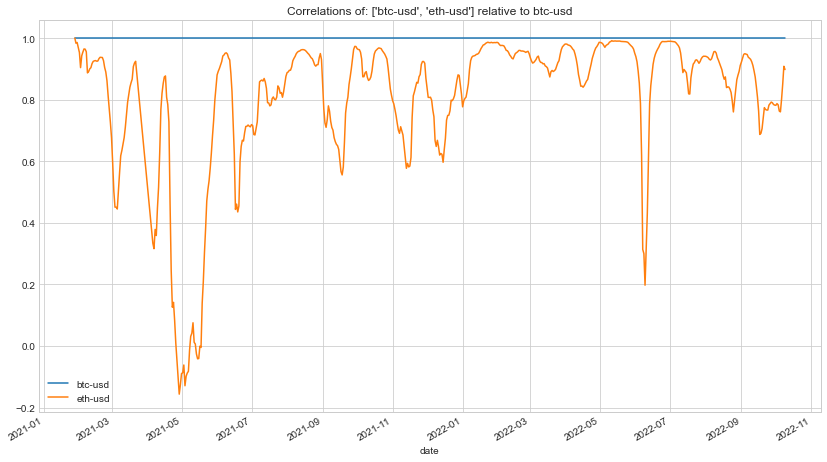

In [13]:
# Correlation Moving Average Function
# Confirm the input DF index is a Datetime index

def corrMA(df, window="30D", test="btc-usd", corrs=["eth-usd"]):
    temp = df.rolling(window).corr()
    
    # Insert the independent variable ticker to the corrs list
    if not test in corrs:
        corrs.insert(0, test)
        
    df_corr = temp[test].unstack()[corrs]
    
    title = "Correlations of: " + str(corrs) + " relative to " + test
    df_corr.plot(title=title)
    
    df_corr.rename(columns={test: "corr-"+test}, inplace=True)
    for i in corrs:
        df_corr.rename(columns={i: "corr-"+i}, inplace=True)
        
    return df_corr

btc_eth_30 = corrMA(crypto_df_dropna)

# crypto_df_dropna.rolling("30D").corr()

In [14]:
# btc_eth_sol_ada_30 = corrMA(crypto_df_dropna, corrs=["eth-usd", "sol-usd", "ada-usd"])

In [15]:
# btc_eth_sol_ada_90 = corrMA(crypto_df_dropna, window="90D", corrs=["eth-usd", "sol-usd", "ada-usd"])

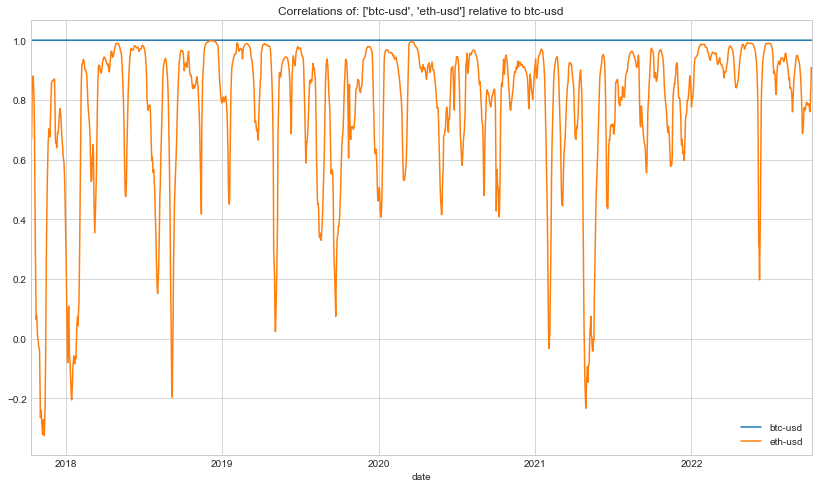

In [16]:
# BTC and ETH all time

btc_eth_ALL = corrMA(crypto_df)

In [17]:
# Next question is how do I go about plotting this!

# Unstack the data associated with one column and get the correlations associated with it! 
# test["btc-usd"].unstack()

# Test / if done correctly, then the "btc-usd" to self correlation should be 1
# test["btc-usd"].unstack()["btc-usd"]

In [18]:
# Plot the correlations!
# test["btc-usd"].unstack()[["btc-usd", "eth-usd"]].plot()

In [19]:
# New hypothesis / what happens when the correlation with BTC drops below some threshold?
# Can we create a correlation MA technical indicator where we know what will happen to some cryptos
# based on the "gold standard" of BTC? 

Create a function that can see the periods where correlation is low and track the price changes in those ranges to see what happened. Which way did BTC change and the others did not, and by how much?

In [20]:
# btc_eth_ALL
# This is ALL TIME the 30 day rolling correlation average for BTC/ETH based on the data... Use this as sample for testing. 

# Get the 
# crypto_df_30_all_rolling = df.rolling(window).corr()
# btc_eth_rolling = crypto_df.rolling("30D").corr()["btc-usd"].unstack([["btc-usd", "eth-usd"]])
# btc_eth_rolling

# Find where the correlations are LOW and drop other NaN values
# low_corrs = btc_eth_ALL.where(btc_eth_ALL["eth-usd"] < .3).dropna()
# low_corrs

# Function for corr & plots of situations
### Also, checking the pricing for stuff

- df = dataframe with prices
- window = INTEGER representing the time window in DAYS --> 30, 50, 200, etc. (or some other valid window string)
- independent = string of indp. variable ticker (dominant asset i.e. btc)
- dependent = 1 dep. variable ticker(s) (dependent asset i.e. eth)
- corr_ratio = float for correlation ratio (.3, .5, etc.)

In [57]:
from datetime import timedelta
# import functools 

def corrma_analysis(df, window, independent, dependent, corr_ratio):
    # Get the overall corrma for the window
    corr_df = corrMA(df, str(window) + "D", independent, [dependent])
    
    # Compute the price change over the window (observation purposes)
    price_change = df[[independent, dependent]].rolling(window).apply(lambda x: x.iloc[-1] - x.iloc[0])
    price_change.rename(columns={independent: "window-change-"+independent, dependent: "window-change-"+dependent}, inplace=True)
    
    # Merge the information together(corrs, price change, asset actual price)
    main_df = corr_df.join(price_change)
    main_df = main_df.join(df[[independent, dependent]])
    
    
    # Get the "low_corrs" based on the corr_ratio
    low_corrs = main_df.where(main_df["corr-" + dependent] < corr_ratio).dropna()  # .dropna() required to remove the other NaN rows
    
    # Merge in these rows... Add a new column with the corr + NaN vals...
    main_df["corr-below-ratio"] = low_corrs[["corr-" + dependent]]
    
    # Add % change columns (for use if we want)
    main_df["%-" + independent] = main_df[independent].pct_change(1)
    main_df["%-" + dependent] = main_df[dependent].pct_change(1)
    
    # Compute cumulative returns
    main_df["cumret-"+independent] = main_df[[independent]].apply(lambda x: x / x[0])
    main_df["cumret-"+dependent] = main_df[[dependent]].apply(lambda x: x / x[0])
    
    
    # Test plots
    main_df.plot(y=[dependent, independent])
    main_df.plot(y=["cumret-"+dependent, "cumret-"+independent]).axhline(y = 1, color = "black", lw=2)
    # main_df.plot(y=["corr-"+dependent, "corr-"+independent])
    main_df.plot(y=["corr-below-ratio", "corr-"+independent])
    
    
    # Get the WINDOW of days before/after the ratio drops below the threshold
    dates = list(main_df.dropna().index)

    day = dates[0]  # first day where corrma triggered

    joiner = main_df.loc[day - timedelta(days=window): day + timedelta(days=window)]  # initial rows for the index. 

    # For all dates where corrma ratio < threshold, find WINDOW days before and after it.
    for i in dates:
        temp = main_df.loc[i - timedelta(days=window): i + timedelta(days=window)]
        joiner = pd.concat([joiner, temp]).drop_duplicates()
        
    
    # Add a column to signify the special dates in main_df
    joiner_new = pd.DataFrame(index = joiner.index)
    joiner_new["adjusted"] = True

    main_df["dep-window-dates"] = joiner_new[["adjusted"]]
    
    
    # Filter out and plot the ADJUSTED DATES cumulative returns ! To show the gaps!
    # This will grab the dates found in the WINDOW period before and after the corrma threshold and plot the cumret
    range_df = main_df.where(main_df["dep-window-dates"])
    
    ax = range_df.plot.line(y=["cumret-"+dependent, "cumret-"+independent])
    
    # Split dates into VALID < corrma AND leave the WINDOWS alone (highlighting)
    
    # print(main_df.loc[main_df["corr-below-ratio"].isnull()])
    
    null_index = main_df.loc[main_df["corr-below-ratio"].isnull()].index
    valid_index = main_df.loc[main_df["corr-below-ratio"].notnull()].index
    
#     print(null_index)
#     print(valid_index)

    null_dict = [{"date": i, "valid": False} for i in null_index]
    valid_dict = [{"date": i, "valid": True} for i in valid_index]

    null_df = pd.DataFrame(null_dict).set_index("date")
    null_df.index = pd.to_datetime(null_df.index)
    valid_df = pd.DataFrame(valid_dict).set_index("date")
    valid_df.index = pd.to_datetime(valid_df.index)


    x = pd.concat([null_df, valid_df])
    x.sort_index(inplace=True)

    # Working
    s = x["valid"].rolling(2).apply(lambda y: y[0] != y[1])
    s = s.fillna(0.0)
    changes = s.loc[s != 0.0]
    dates = changes.index
    dates

    # Add in the highlights on the chart :D (need to account for if the trend of < .3 corr is STILL HAPPENEING -> odd # elems)
    for i in range(len(dates)):
        if i % 2 == 0:
            start = i 
            end = i+1

            if end > len(dates):
                end = start

            print("CORRMA triggered! Start:", dates[start], "\tEnd:", dates[end])
            ax.axvspan(dates[start], dates[end], facecolor="red", alpha=.2)


    # Re-plot the correlations chart w/ highlights
    ax2 = main_df.plot.line(y=["corr-below-ratio", "corr-"+independent])

    for i in range(len(dates)):
        if i % 2 == 0:
            start = i 
            end = i+1

            if end > len(dates):
                end = start

            # print(dates[start], dates[end])
            ax2.axvspan(dates[start], dates[end], facecolor="red", alpha=.2)
    
    
    return main_df

# Notes
I think there needs to be some checking when some assets FULLY diverge from BTC! What happens? Are they going to the moon? What percentage of the time are they going up vs. going down?

Also, check where they diverge slightly, are they increasing faster or slower than btc?

CORRMA triggered! Start: 2017-11-08 00:00:00 	End: 2017-11-26 00:00:00
CORRMA triggered! Start: 2017-12-30 00:00:00 	End: 2018-01-19 00:00:00
CORRMA triggered! Start: 2018-02-28 00:00:00 	End: 2018-03-13 00:00:00
CORRMA triggered! Start: 2018-09-02 00:00:00 	End: 2018-09-09 00:00:00
CORRMA triggered! Start: 2019-04-27 00:00:00 	End: 2019-05-15 00:00:00
CORRMA triggered! Start: 2019-07-04 00:00:00 	End: 2019-07-19 00:00:00
CORRMA triggered! Start: 2019-08-08 00:00:00 	End: 2019-08-29 00:00:00
CORRMA triggered! Start: 2019-09-18 00:00:00 	End: 2019-09-24 00:00:00
CORRMA triggered! Start: 2020-07-02 00:00:00 	End: 2020-07-23 00:00:00
CORRMA triggered! Start: 2020-08-21 00:00:00 	End: 2020-08-29 00:00:00
CORRMA triggered! Start: 2020-10-02 00:00:00 	End: 2020-10-10 00:00:00
CORRMA triggered! Start: 2020-10-30 00:00:00 	End: 2020-11-19 00:00:00
CORRMA triggered! Start: 2020-12-26 00:00:00 	End: 2020-12-28 00:00:00
CORRMA triggered! Start: 2021-01-31 00:00:00 	End: 2021-02-07 00:00:00
CORRMA

,corr-btc-usd,corr-ada-usd,window-change-btc-usd,window-change-ada-usd,btc-usd,ada-usd,corr-below-ratio,%-btc-usd,%-ada-usd,cumret-btc-usd,cumret-ada-usd,dep-window-dates
date,,,,,,,,,,,,
2017-10-10,NaN,NaN,NaN,NaN,4781.990234,0.021531,NaN,NaN,NaN,1.000000,1.000000,True
2017-10-11,1.0,1.000000,NaN,NaN,4826.479981,0.022520,NaN,0.009304,0.045934,1.009304,1.045934,True
2017-10-12,1.0,0.990207,NaN,NaN,5446.910156,0.026252,NaN,0.128547,0.165719,1.139047,1.219265,True
2017-10-13,1.0,0.922875,NaN,NaN,5647.209961,0.033641,NaN,0.036773,0.281464,1.180933,1.562445,True
2017-10-14,1.0,0.941624,NaN,NaN,5831.790039,0.032465,NaN,0.032685,-0.034957,1.219532,1.507826,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,1.0,0.719543,1371.601902,-0.031547,20163.894906,0.431018,NaN,-0.008855,-0.010646,4.216632,20.018485,True
2022-10-06,1.0,0.715737,668.477371,-0.049980,19964.048179,0.428784,NaN,-0.009911,-0.005183,4.174841,19.914728,True
2022-10-07,1.0,0.736009,210.482288,-0.055009,19532.213283,0.424025,NaN,-0.021631,-0.011099,4.084536,19.693697,True


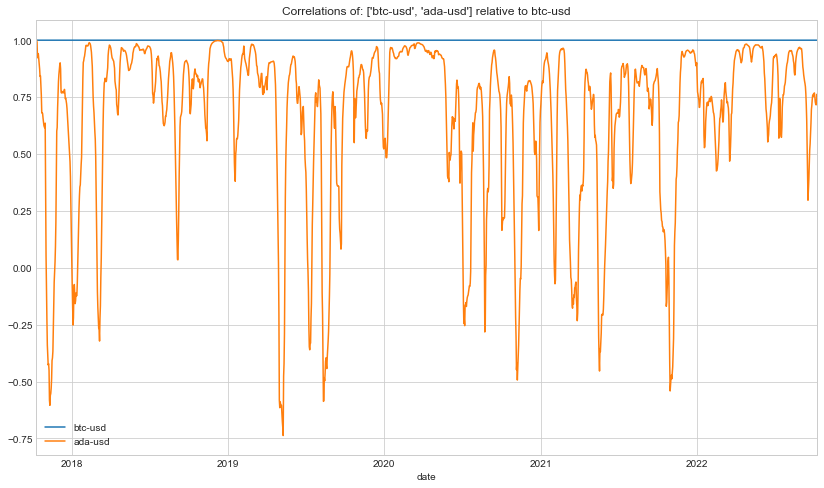

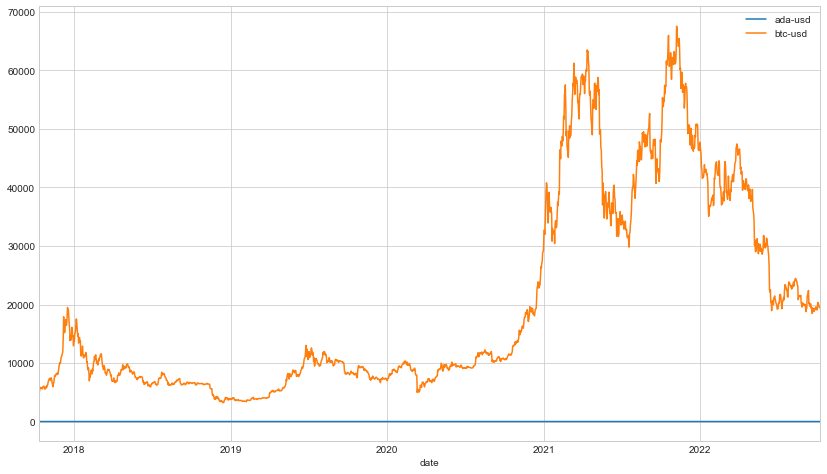

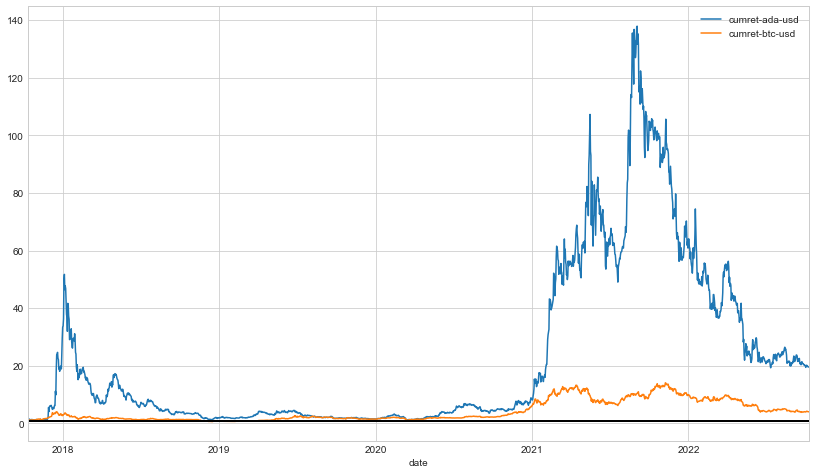

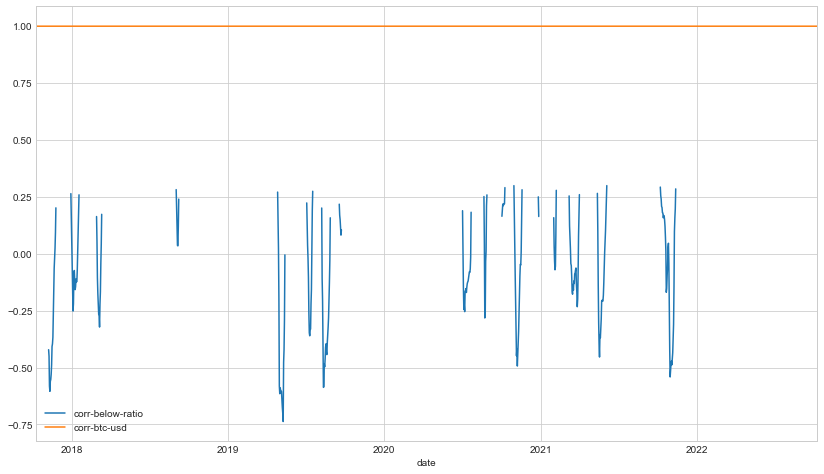

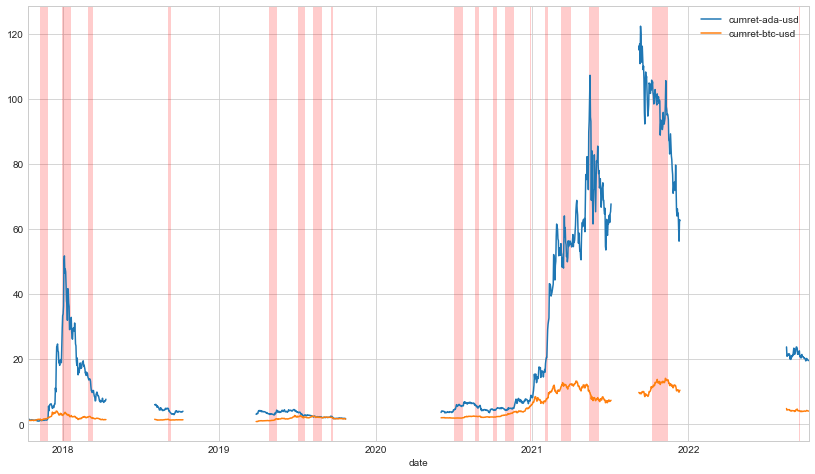

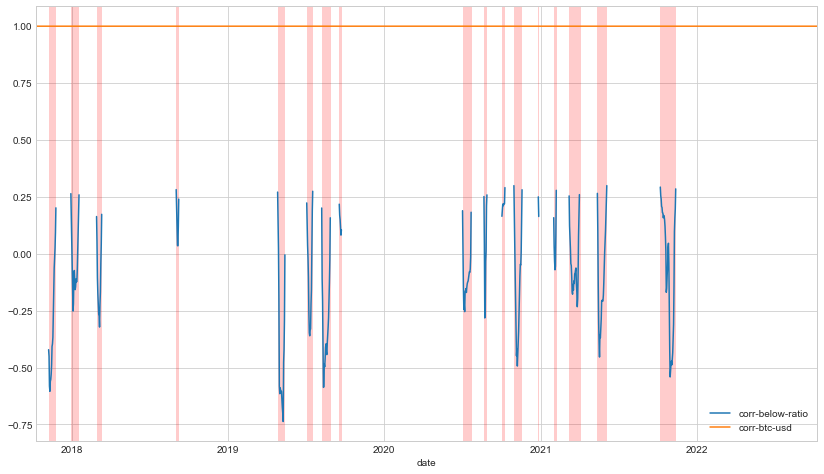

In [61]:
test = corrma_analysis(crypto_df, 30, "btc-usd", "ada-usd", .3)
test# .head(15)

In [23]:
# Do a 30D Rolling window for finding price differences for btc-usd and eth-usd

# price_change_30D = crypto_df[["btc-usd", "eth-usd"]].rolling("30D").apply(lambda x: x.iloc[-1] - x.iloc[0])
# price_change_30D.rename(columns={"btc-usd": "btc-30D-change", "eth-usd": "eth-30D-change"}, inplace=True)
# price_change_30D

# My understanding is that in the "rolling" it's going to grab 30 days worth, and compute the "final day"
#   I.e., index -1, MINUS the starting date (i.e, index 0).

# Quick testing, this looks correct!

In [24]:
# Join the two dataframes and compare the corrs. 

In [25]:
# x = low_corrs.join(price_change_30D)
# x = x.join(crypto_df[["btc-usd", "eth-usd"]].rename(columns={"btc-usd": "btc-price", "eth-usd": "eth-price"}))

# x.head()

Could the correlation dropping below some # indicate a buy/sell signal? I'm not sure if this makes any sense, because correlation can go in BOTH directions.

In [26]:
# Combine low corrs df, add 30 days in front, add 30 days behind
# see what's going on with the price, and plot the corrs chart as well. 

# crypto_df - The price history ("btc-usd" and "eth-usd")
# low_corrs - The df w/ corrs < .3... Need to join these and get the prices consistent! Perhaps compute % change myself? 



# test = crypto_df[["btc-usd", "eth-usd"]].join(low_corrs.rename(columns={"btc-usd":"btc-corr", "eth-usd":"eth-corr"}))

# test["btc-pct"] = test["btc-usd"].pct_change(1)
# test["eth-pct"] = test["eth-usd"].pct_change(1)

# # test["btc-cumret"] = test["btc-usd"].apply(lambda x:x/x[0])
# # test["eth-cumret"] = test["eth-usd"].apply(lambda x:x/x[0])
# test = test.assign(btc_cumret = lambda x: x["btc-usd"] / x["btc-usd"][0])
# test = test.assign(eth_cumret = lambda x: x["eth-usd"] / x["eth-usd"][0])
# test

In [27]:
# test.plot(y=["btc-usd", "eth-usd"])
# test.plot(y=["eth_cumret", "btc_cumret"]).axhline(y = 1, color = "black", lw=2)
# test.plot(y=["eth-corr", "btc-corr"])
# test

In [28]:
# Need to highlight the periods now... New idea is to create a new DF, add in the indices 30 days before/after, 
# Then add in highlighting BASED on those

# test.dropna()

In [29]:
# from datetime import timedelta
# import functools 

# Separate ONLY the days w/ negative correlations
# highlight = low_corrs.dropna()

# # Get the dates where the correlation dropped below the threshold
# dates = list(test.dropna().index)
# # print(dates)


# day = dates[0]

# joiner = test.loc[day - timedelta(days=30): day + timedelta(days=30)]

# # New idea - drop duplicates and THEN merge the new index in!

# for i in dates:
#     temp = test.loc[i - timedelta(days=30): i + timedelta(days=30)]
#     # print(temp)
#     joiner = pd.concat([joiner, temp]).drop_duplicates()



# for i in dates:
#     pass
    # print(day)
    # x = pd.merge(crypto_df[["btc-usd", "eth-usd"]].loc[i - timedelta(days=30): i + timedelta(days=30)], joiner, left_index=True, right_index=True, validate="many_to_one")
    # print(x)
    # joiner = x.drop_duplicates()

# joiner.rename(columns={"btc-usd": "btc-bad-corr", "eth-usd": "eth-bad-corr"}, inplace=True)

# joiner
    

# pd.merge(crypto_df[["btc-usd", "eth-usd"]].loc[dates[0] - timedelta(days=30): dates[0] + timedelta(days=30)], crypto_df[["btc-usd", "eth-usd"]].loc[dates[1] - timedelta(days=30): dates[1] + timedelta(days=30)], left_index=True, right_index=True, copy=False)
    

    
    
# New idea - Lambda function

# crypto_df[["btc-usd", "eth-usd"].apply(lambda x: print(x.index))]
    
    
    
    
    
# I just need to figure out how to get these all joined together (efficiently?)
    
    
# # Prices for 30 days before & after the .3 periods
# prices

# low_corrs


# Get the price data associated w/ the stuff!
# crypto_df.loc[day-timedelta(days=30):day+timedelta(days=30)]



# Get price data for dates 30 days before // 30 days after... (is this algo efficient?)
# for i in dates:
#     print("curr day", i, "new day", i - timedelta(days=30))

# dates

In [30]:
# # joiner now has the X rows w/ the 30 days added BEFORE and AFTER the situation.
# # Add a column to differentiate these
# joiner["adjusted"] = True

# # Okay - the situation with .join() is both dataframes have the same columns. So, .join tries to merge on the
# # index, but the columns are the same, so it needs suffixes for each to keep the data correctly... I suppose I 
# # could work within that situation!


# join_returns = test.join(joiner, lsuffix="_orig", rsuffix="_adj") # Needed to change this order... ONLY keeping the test!
# join_returns

NameError: name 'joiner' is not defined

In [ ]:
# # join_returns = join_returns.dropna() 
# # Set the cumret values to NaN where btc-corr is NaN


# # join_returns.loc[join_returns["btc-corr"].isnull(), 'btc_cumret'] = np.NaN
# # join_returns.loc[join_returns["eth-corr"].isnull(), 'eth_cumret'] = np.NaN
# join_returns

In [ ]:
# # Original ALL dates

# join_returns.plot.line(y=["eth_cumret_orig", "btc_cumret_orig"])
# join_returns.plot.line(y=["eth-corr_orig", "btc-corr_orig"])
# # test.plot(y=["eth-corr", "btc-corr"], figsize=(14.0, 4.0))

In [ ]:
# # Adjusted dates (30 d pre/after)

# ax = join_returns.plot.line(y=["eth_cumret_adj", "btc_cumret_adj"])

# # Goal - highlight the time where the corr WAS < .3 
# # That's currently able to be shown w/ the eth-corr_orig indices

# # locate the .isnull() rows and get the dates/set them accordingly? I need to split the dates/regions !

# null_index = join_returns.loc[join_returns["eth-corr_orig"].isnull()].index
# valid_index = join_returns.dropna().index

# null_dict = [{"date": i, "valid": False} for i in null_index]
# valid_dict = [{"date": i, "valid": True} for i in valid_index]

# null_df = pd.DataFrame(null_dict).set_index("date")
# null_df.index = pd.to_datetime(null_df.index)
# valid_df = pd.DataFrame(valid_dict).set_index("date")
# valid_df.index = pd.to_datetime(valid_df.index)


# x = pd.concat([null_df, valid_df])
# x.sort_index(inplace=True)

# # Working
# s = x["valid"].rolling(2).apply(lambda y: y[0] != y[1])
# s = s.fillna(0.0)
# changes = s.loc[s != 0.0]
# dates = changes.index
# dates

# # Add in the highlights on the chart :D (need to account for if the trend of < .3 corr is STILL HAPPENEING -> odd # elems)
# for i in range(len(dates)):
#     if i % 2 == 0:
#         start = i 
#         end = i+1
        
#         if end > len(dates):
#             end = start
        
#         print(dates[start], dates[end])
#         ax.axvspan(dates[start], dates[end], facecolor="red", alpha=.2)




# # x["valid"].rolling("2D").apply(lambda x: x[0] != x[1])

# # null_df = pd.DataFrame(index=null_index)
# # null_df[""]

# # series = join_returns["eth-corr_orig"]  # Using two [[]] returns a DF!
# # series.loc[series.notnull()].apply(lambda x: 10)
# # series.dropna()
# # .rolling("2D").apply(lambda x: x[0] != x[1])
# # x.dropna()


# ax2 = join_returns.plot.line(y=["eth-corr_orig", "btc-corr_orig"])

# for i in range(len(dates)):
#     if i % 2 == 0:
#         start = i 
#         end = i+1
        
#         if end > len(dates):
#             end = start
        
#         print(dates[start], dates[end])
#         ax2.axvspan(dates[start], dates[end], facecolor="red", alpha=.2)